In [352]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [353]:
df = pd.read_csv('/content/train.txt', header=None, sep=';', names=['Comment', 'Emotion'], encoding='utf-8')
df.head()

,Comment,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [354]:
df['Length'] = [len(x) for x in df['Comment']]

In [355]:
df.head()

,Comment,Emotion,Length
0,i didnt feel humiliated,sadness,23
1,i can go from feeling so hopeless to so damned...,sadness,108
2,im grabbing a minute to post i feel greedy wrong,anger,48
3,i am ever feeling nostalgic about the fireplac...,love,92
4,i am feeling grouchy,anger,20


In [356]:
df.isnull().sum()

,0
Comment,0
Emotion,0
Length,0


In [357]:
df.duplicated().sum()

1

In [358]:
df.drop_duplicates(inplace=True)

In [359]:
df['Emotion'].value_counts()

,count
Emotion,
joy,5361
sadness,4666
anger,2159
fear,1937
love,1304
surprise,572


<Axes: xlabel='count', ylabel='Emotion'>

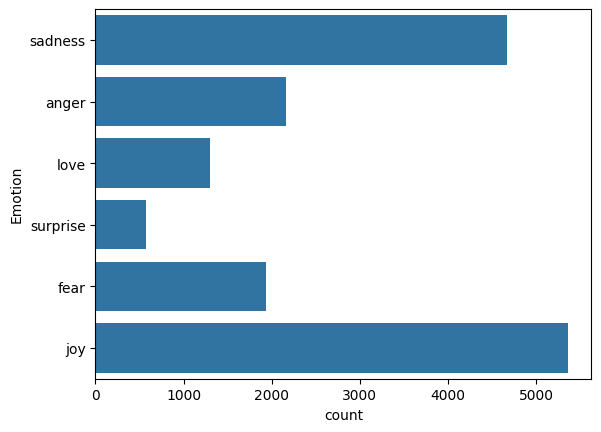

In [360]:
sns.countplot(df['Emotion'])

<Axes: xlabel='Length', ylabel='Count'>

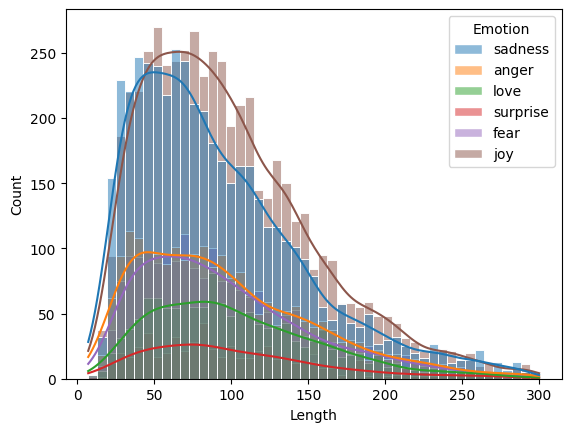

In [361]:
sns.histplot(data=df, x='Length', kde=True, hue='Emotion', alpha=.5, edgecolor=[1,1,1,1])

In [362]:
from wordcloud import WordCloud

In [363]:
def words_cloud(wordcloud, emotion):
  plt.figure(figsize=(10,10))
  plt.imshow(wordcloud)
  plt.title(emotion)
  plt.axis('off')
  plt.show()

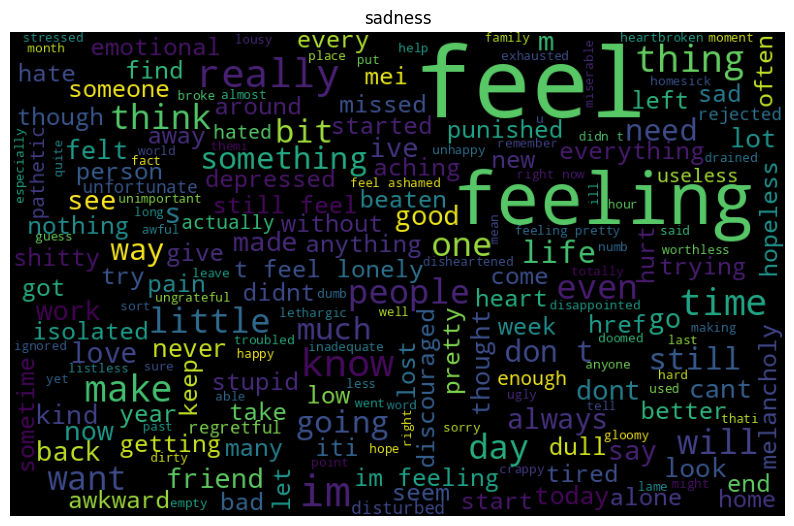

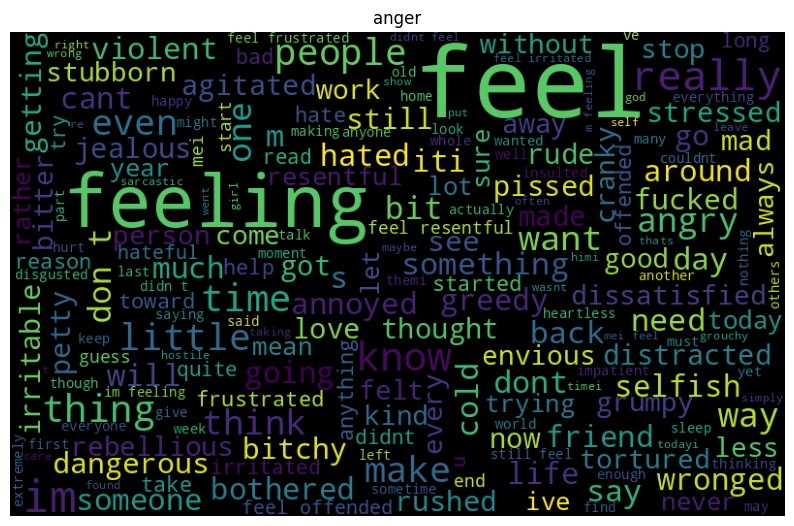

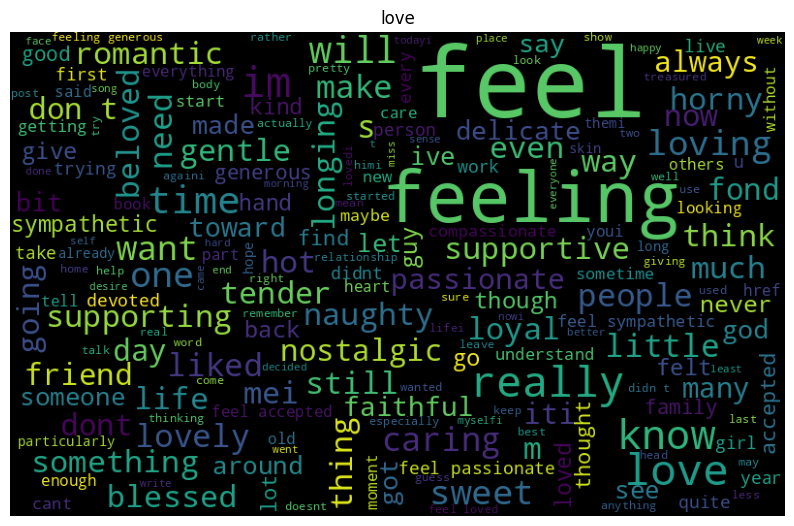

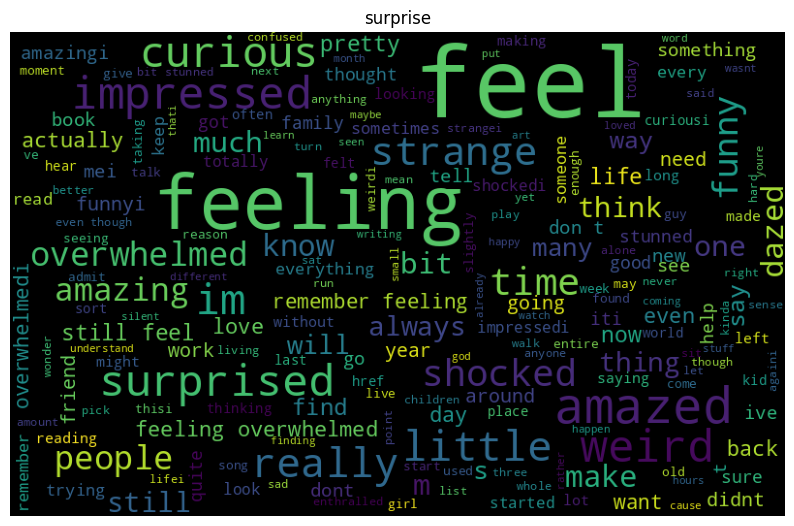

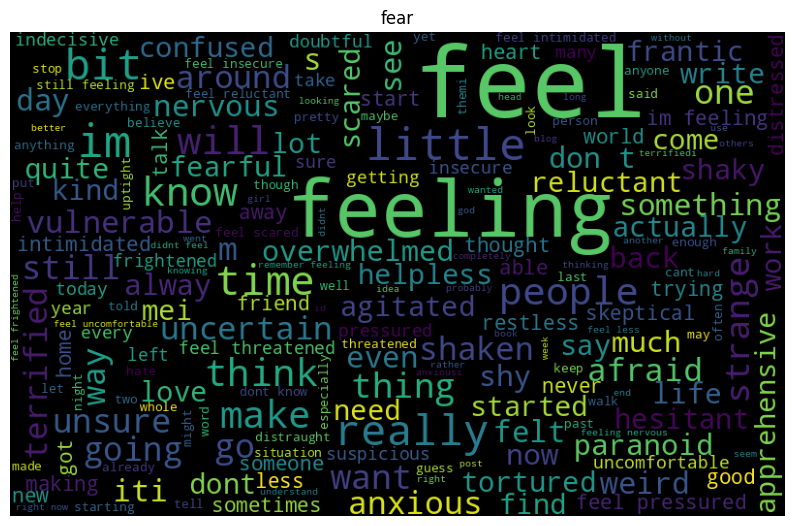

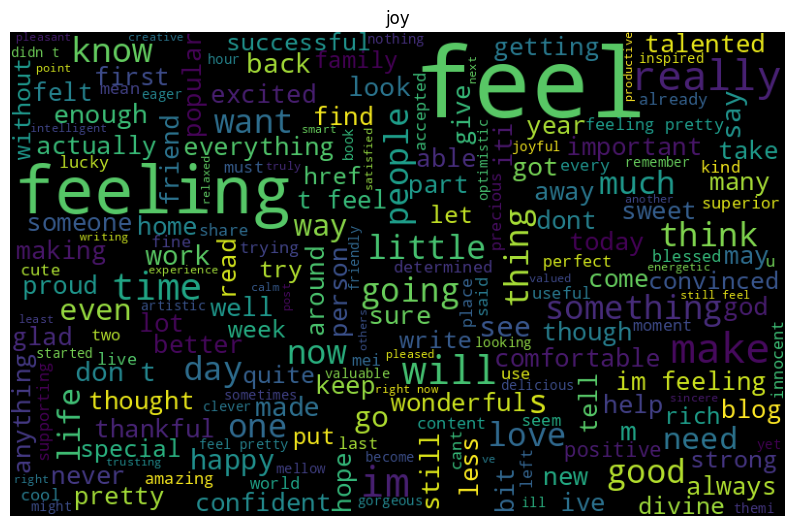

In [364]:
emotions = df['Emotion'].unique()
for emotion in emotions:
  text = "".join([sentence for sentence in df.loc[df['Emotion']==emotion, 'Comment']])
  wc = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(text)
  words_cloud(wc, emotion)

In [365]:
# x = 'i am feeling great'
# wc = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(x)
# plt.imshow(wc)

In [366]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [367]:
df['Emotion'] = le.fit_transform(df['Emotion'])

In [368]:
df.head()

,Comment,Emotion,Length
0,i didnt feel humiliated,4,23
1,i can go from feeling so hopeless to so damned...,4,108
2,im grabbing a minute to post i feel greedy wrong,0,48
3,i am ever feeling nostalgic about the fireplac...,3,92
4,i am feeling grouchy,0,20


In [369]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [370]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [371]:
from sklearn.metrics import accuracy_score, classification_report

In [372]:
df2 = df.copy()

In [373]:
df2.head()

,Comment,Emotion,Length
0,i didnt feel humiliated,4,23
1,i can go from feeling so hopeless to so damned...,4,108
2,im grabbing a minute to post i feel greedy wrong,0,48
3,i am ever feeling nostalgic about the fireplac...,3,92
4,i am feeling grouchy,0,20


In [374]:
import nltk
import re
from nltk.stem import PorterStemmer

In [375]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [376]:
stop_words = nltk.corpus.stopwords.words('english')

In [377]:
stemmer = PorterStemmer()

In [378]:
def clean_text(text):
  text = text.lower()
  text = re.sub(r'[^a-z]', ' ', text)
  text = text.split()
  text = [word for word in text if word not in stop_words]
  text = [stemmer.stem(word) for word in text]
  return " ".join(text)

In [379]:
# clean_text("I am loving dining demon 23 & hi is to # the")

In [380]:
df['Clean_Comment'] = df['Comment'].apply(clean_text)

In [381]:
df.head()

,Comment,Emotion,Length,Clean_Comment
0,i didnt feel humiliated,4,23,didnt feel humili
1,i can go from feeling so hopeless to so damned...,4,108,go feel hopeless damn hope around someon care ...
2,im grabbing a minute to post i feel greedy wrong,0,48,im grab minut post feel greedi wrong
3,i am ever feeling nostalgic about the fireplac...,3,92,ever feel nostalg fireplac know still properti
4,i am feeling grouchy,0,20,feel grouchi


In [382]:
X_train, X_test, y_train, y_test = train_test_split(df['Clean_Comment'], df['Emotion'], test_size=0.2, random_state=42)

In [383]:
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [384]:
# classifier = {
#     'MultinomialNB': MultinomialNB(),
#     'LogisticRegression': LogisticRegression(),
#     'RandomForestClassifier': RandomForestClassifier(),
#     'SVC': SVC()
# }

In [385]:
# for name, clf in classifier.items():
#   clf.fit(X_train_tfidf, y_train)
#   y_pred = clf.predict(X_test_tfidf)
#   print(f"{name} Accuracy: {accuracy_score(y_test, y_pred)}")
#   print(classification_report(y_test, y_pred))

In [386]:
rf = RandomForestClassifier()
rf.fit(X_train_tfidf, y_train)
y_pred = rf.predict(X_test_tfidf)

In [387]:
def predict_emotion(text):
  text = clean_text(text)
  text = tfidf.transform([text])
  emotion = rf.predict(text)
  return le.inverse_transform(emotion)[0]

In [388]:
# predict_emotion("i am feeling great")

In [389]:
sentences = [
    "I am feeling great",
    "I am feeling lonely",
    "What should I do?",
    "Don't yell at me",
    "He is really sweet"
]

In [390]:
for sentence in sentences:
  print(predict_emotion(sentence))

joy
sadness
anger
anger
love


In [391]:
import pickle
pickle.dump(rf, open('emotion_prediction.pkl', 'wb'))
pickle.dump(tfidf, open('tfidf.pkl', 'wb'))
pickle.dump(le, open('le.pkl', 'wb'))